In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercício 8.1

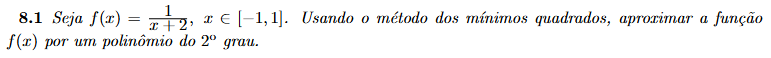

Nesse caso, para realizar a aplicação de uma aproximação de segundo grau usando o MMQ, tomamos

$$ e_0 = (1, 1, \dots, 1)^T; $$
$$ e_1 = (x_0, x_1, \dots, x_m)^T; $$
$$ e_2 = (x_0^2, x_1^2, \dots, x_m^2)^T$$

Mais detalhes em comentários no código.

## Resolução Numérica

In [2]:
M = 50
fx81 = lambda x: 1 / (x + 2)

x81 = np.linspace(-1, 1, M)
y81 = fx81(x81)
e0_81 = np.power(x81, 0)
e1_81 = np.power(x81, 1)
e2_81 = np.power(x81, 2)
e_81 = [e0_81, e1_81, e2_81]
# Matriz de produtos internos
C_81 = np.zeros((3, 3), dtype=np.float64)
for i in range(3):
    for j in range(2, i - 1, -1):
        val = np.dot(e_81[i], e_81[j])
        C_81[i, j] = val
        if i != j:
            C_81[j, i] = val

# Vetor de produtos internos
b_81 = np.zeros((3,), dtype=np.float64)
for i in range(3):
    b_81[i] = np.dot(y81, e_81[i])

# Resolução do sistema linear
a_81 = np.linalg.solve(C_81, b_81)

Comparação do resultado obtido

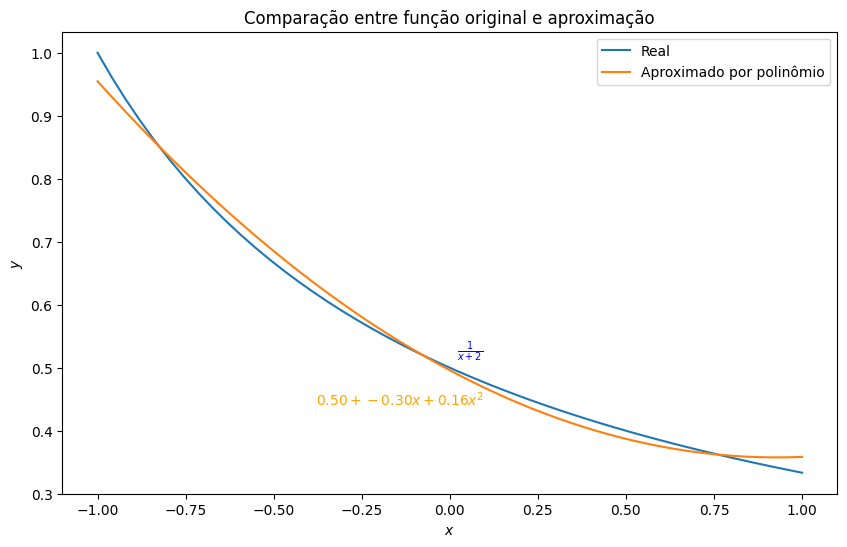

In [3]:
poly81 = lambda x: a_81[0] + a_81[1] * x + a_81[2] * x ** 2
poly81_vals = poly81(x81)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x81, y81, label="Real")
ax.plot(x81, poly81_vals, label="Aproximado por polinômio")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
ax.annotate("$\\frac{1}{x + 2}$", (x81[len(x81) // 2], 1.05 * y81[len(x81) // 2]), color="blue")
ax.annotate(f"${a_81[0]:.2f} + {a_81[1]:.2f} x + {a_81[2]:.2f} x^2$", (x81[len(x81) // 2] - 0.4, 0.9 * poly81_vals[len(x81) // 2]), color="orange")
ax.set_title("Comparação entre função original e aproximação")
plt.show()

## Resolução Analítica

Produtos internos que envolvem $f$ (os produtos envolvendo $1,x,x^2$ não mudam, já tendo sido calculados em uma demonstração da lista):

---

$$ \langle f, 1 \rangle = \int_{-1}^1 \frac{1}{x + 2}\ dx $$

Definindo $u = x + 2 \Rightarrow du = dx$, realiza-se a integração e substituição:
$$ \int_{1}^3 \frac{1}{u}\ du = \left[ \ln(u) \right]_{1}^3 = \ln(3) - \ln(1) = \ln(3) $$

---

$$ \langle f, x \rangle = \int_{-1}^1 \frac{x}{x + 2}\ dx $$

Novamente, utilizando $u = x + 2$:

$$ \int_1^3 \frac{u - 2}{u}\ du = \int_1^3 1\ du - 2 \int_1^3 \frac{1}{u}\ du = [u]_1^3 - 2[\ln(u)]_1^3 = 2 - 2(\ln(3) - \ln(1)) = 2 - 2\ln(3) = 2 - \ln(9) $$

---

$$ \langle f, x^2 \rangle = \int_{-1}^1 \frac{x^2}{x + 2}\ dx $$

Aplicando a mesma substituição:

$$ \int_1^3 \frac{(u - 2)^2}{u}\ du = \int_1^3 \frac{u^2 - 4u + 4}{u}\ du = \int_1^3 u\ du - 4 \int_1^3 1\ du + 4 \int_1^3 \frac{1}{u}\ du $$
$$ = \left[\frac{u^2}{2}\right]_1^3 - 4[u]_1^3 + 4[\ln(u)]_1^3 = \frac{9 - 1}{2} - 8 + 4(\ln(3) - \ln(1)) = -4 + 4 \ln(3) = -4 + \ln(81) $$

Formando o sistema linear:

$$ \begin{bmatrix}2 & 0 & 2/3 \\ 0 & 2/3 & 0 \\ 2/3 & 0 & 2/5 \end{bmatrix} \begin{bmatrix} a_0 \\ a_1 \\ a_2 \end{bmatrix} = \begin{bmatrix} \ln(3) \\ 2 - \ln(9) \\ -4 + \ln(81) \end{bmatrix} $$

Resolvendo a segunda equação:

$$ (2/3) a_1 = 2 - \ln(9) \Rightarrow a_1 = \frac{2 - \ln(9)}{(2/3)} = \frac{6 - \ln(729)}{2} \approx -0.296 $$

Notamos que é muito próximo do valor obtido numericamente. Caso arrendondássemos o valor numérico para três casas decimais, teríamos exatamente o mesmo valor. Para comparar os outros coeficientes, vamos utilizar uma abordagem numérica, para evitar ter de tratar expressões com logaritmos.

In [4]:
tmp_C = np.array([[2, 0, 2/3], [0, 2/3, 0], [2/3, 0, 2/5]])
tmp_b = np.array([np.log(3), 2 - np.log(9), -4 + np.log(81)])
tmp_a = np.linalg.solve(tmp_C, tmp_b)
display("Coeficientes", [f"{a:.2f}" for a in tmp_a])

'Coeficientes'

['0.50', '-0.30', '0.16']

Todos são iguais até a segunda casa decimal.

# Exercício 8.2

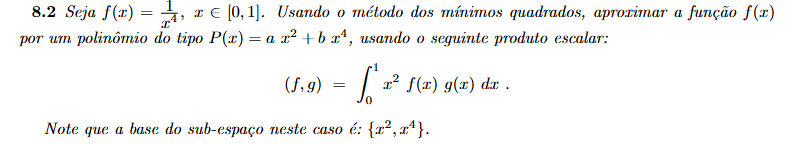

## Resolução Numérica

Note que nesse caso iremos utilizar o produto interno convencional de dois vetores.

In [5]:
fx82 = lambda x: 1 / (x ** 4)

# Não permitindo x igual a zero.
x82 = np.linspace(0.1, 1, M)
y82 = fx82(x82)
e0_82 = np.power(x82, 2)
e1_82 = np.power(x82, 4)
e_82 = [e0_82, e1_82]
n_82 = len(e_82)

# Matriz de produtos internos
C_82 = np.zeros((n_82, n_82), dtype=np.float64)
for i in range(n_82):
    for j in range(n_82 - 1, i - 1, -1):
        val = np.dot(e_82[i], e_82[j])
        C_82[i, j] = val
        if i != j:
            C_82[j, i] = val

# Vetor de produtos internos
b_82 = np.zeros((n_82,), dtype=np.float64)
for i in range(n_82):
    b_82[i] = np.dot(y82, e_82[i])

# Resolução do sistema linear
a_82 = np.linalg.solve(C_82, b_82)

Comparação do resultado obtido

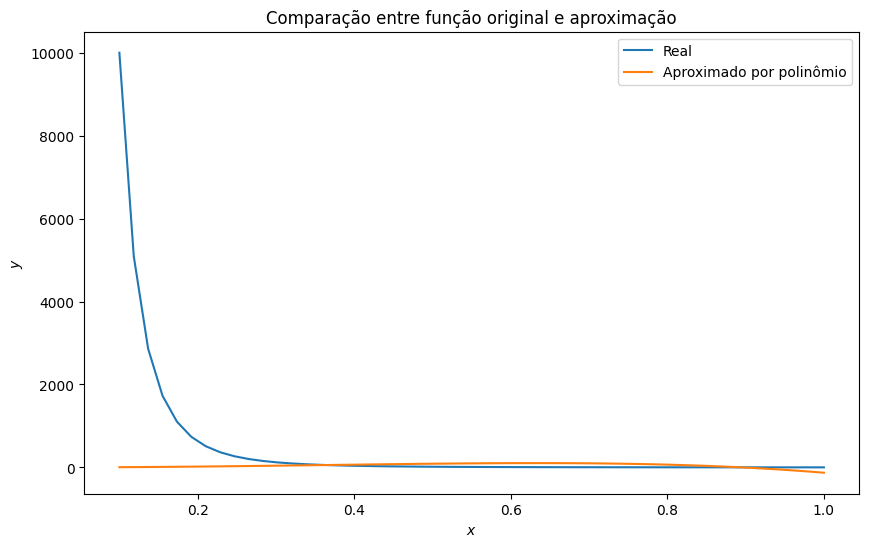

In [6]:
poly82 = lambda x: a_82[0] * x ** 2 + a_82[1] * x ** 4
poly82_vals = poly82(x82)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x82, y82, label="Real")
ax.plot(x82, poly82_vals, label="Aproximado por polinômio")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
ax.set_title("Comparação entre função original e aproximação")
plt.show()

## Resolução Analítica

Produtos internos envolvendo a base do sub-espaço:

$$ \langle x^2, x^2 \rangle = \int_0^1 x^2 x^2 x^2\ dx = \int_0^1 x^6\ dx = \left[ \frac{x^7}{7} \right]_0^1 = \frac{1}{7} $$
$$ \langle x^2, x^4 \rangle = \langle x^4, x^2 \rangle = \int_0^1 x^2 x^2 x^4\ dx = \int_0^1 x^8\ dx = \left[ \frac{x^9}{9} \right]_0^1 = \frac{1}{9} $$
$$ \langle x^4, x^4 \rangle = \int_0^1 x^2 x^4 x^4\ dx = \int_0^1 x^{10}\ dx = \left[ \frac{x^{11}}{11} \right]_0^1 = \frac{1}{11} $$

---

e envolvendo $f$:

$$ \langle f, x^2 \rangle = \int_0^1 x^2 \frac{1}{x^4} x^2\ dx = \int_0^1 1\ dx = [x]_0^1 = 1 $$
$$ \langle f, x^4 \rangle = \int_0^1 x^2 \frac{1}{x^4} x^4\ dx = \int_0^1 x^2\ dx = \left[ \frac{x^3}{3} \right]_0^1 = \frac{1}{3} $$

Sistema linear formado:

$$ \begin{bmatrix} 1/7 & 1/9 \\ 1/9 & 1/11 \end{bmatrix} \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} = \begin{bmatrix} 1 \\ 1/3 \end{bmatrix} $$

$$ (1/7) a_0 = 1 - (1/9) a_1 \Rightarrow a_0 = \frac{1 - (1/9) a_1}{(1/7)} $$

Substituindo na segunda equação:

$$ (1/9) \left( \frac{1 - (1/9) a_1}{(1/7)} \right) + (1/11) a_1 = 1/3 \Rightarrow \frac{(1/9) - (1/9)^2 a_1}{(1/7)} + (1/11) a_1 = 1/3 $$
$$ \Rightarrow (1/9) - (1/9)^2 a_1 + (1/7) (1/11) a_1 = (1/7)(1/3) $$
$$ \Rightarrow (1/77) a_1 - (1/81) a_1 = (1/21) - (1/9) $$
$$ \Rightarrow \frac{4}{6237} a_1 = -\frac{4}{63} \Rightarrow a_1 = -\frac{4}{63} \frac{6237}{4} = \frac{6237}{63} = 99 $$

Logo,

$$ a_0 = \frac{1 - (1/9)(99)}{(1/7)} = \frac{1 - 11}{(1/7)} = -10 \cdot 7 = -70 $$

Conclui-se que o polinômio aproximador é:

$$ p(x) = -70 x^2 + 99 x^4 $$

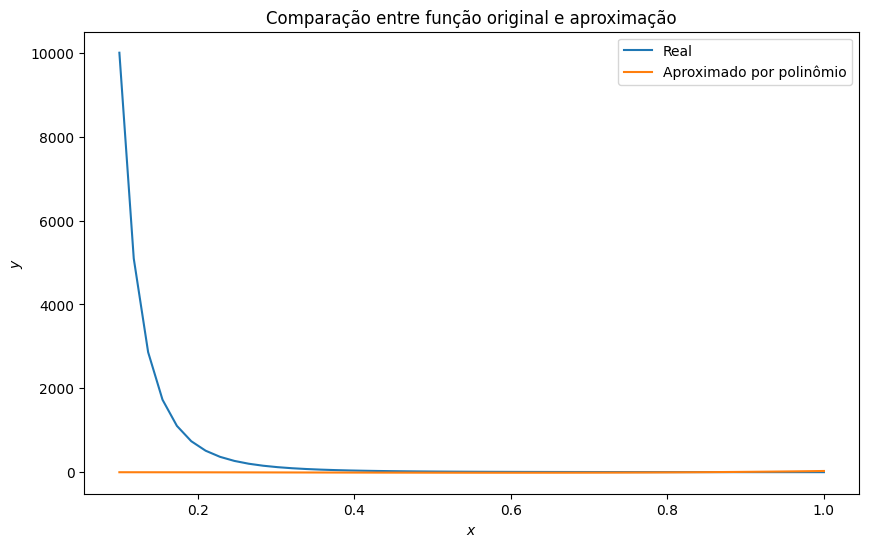

In [7]:
poly82_analytic = lambda x: -70 * (x ** 2) + 99 * (x ** 4)
poly82_analytic_vals = poly82_analytic(x82)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x82, y82, label="Real")
ax.plot(x82, poly82_analytic_vals, label="Aproximado por polinômio")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
ax.set_title("Comparação entre função original e aproximação")
plt.show()

Nenhum dos dois polinômios aproximam a descida abrupta no início do intervalo de forma satisfatória.

# Exercício 8.3

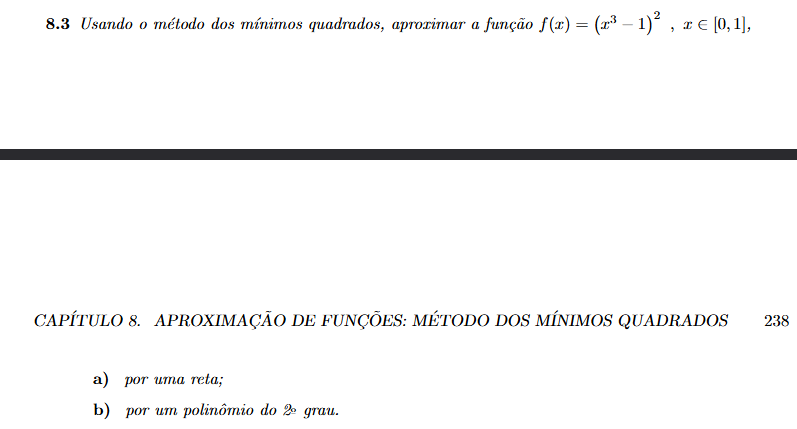

## Soluções numéricas

In [8]:
fx83 = lambda x: (x ** 3 - 1) ** 2
x83 = np.linspace(0, 1, M)
y83 = fx83(x83)
e0_83 = np.power(x83, 0)
e1_83 = np.power(x83, 1)
e2_83 = np.power(x83, 2)
e_83 = [e0_83, e1_83, e2_83]
# Matriz de produtos internos
# No caso do item a), vamos limitar a menor principal 2x2
C_83 = np.zeros((3, 3), dtype=np.float64)
for i in range(3):
    for j in range(2, i - 1, -1):
        val = np.dot(e_83[i], e_83[j])
        C_83[i, j] = val
        if i != j:
            C_83[j, i] = val

# Vetor de produtos internos
b_83 = np.zeros((3,), dtype=np.float64)
for i in range(3):
    b_83[i] = np.dot(y83, e_83[i])

# Resolução do sistema linear para o caso de reta
a_83_reta = np.linalg.solve(C_83[:2, :2], b_83[:2])
# Resolução para o caso quadrático
a_83_quadratico = np.linalg.solve(C_83, b_83)

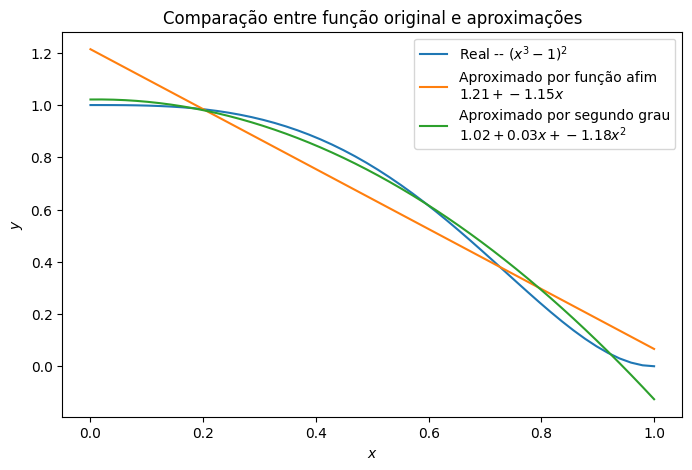

In [9]:
poly83_reta = lambda x: a_83_reta[0] + a_83_reta[1] * x
poly83_reta_vals = poly83_reta(x83)

poly83_quadratico = lambda x: a_83_quadratico[0] + a_83_quadratico[1] * x + a_83_quadratico[2] * x ** 2
poly83_quadratico_vals = poly83_quadratico(x83)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x83, y83, label="Real -- $(x^3 - 1)^2$")
ax.plot(x83, poly83_reta_vals, label=f"Aproximado por função afim\n${a_83_reta[0]:.2f} + {a_83_reta[1]:.2f} x$")
ax.plot(x83, poly83_quadratico_vals, label=f"Aproximado por segundo grau\n${a_83_quadratico[0]:.2f} + {a_83_quadratico[1]:.2f} x + {a_83_quadratico[2]:.2f} x^2$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
ax.set_title("Comparação entre função original e aproximações")
plt.show()

## Soluções analíticas

Produtos internos envolvendo as bases do sub-espaço:

$$ \langle 1, 1 \rangle = \int_0^1 1 \ dx = [x]_0^1 = 1 $$
$$ \langle 1, x \rangle = \langle x, 1 \rangle = \int_0^1 x\ dx = \left[ \frac{x^2}{2} \right]_0^1 = \frac{1}{2} $$
$$ \langle 1, x^2 \rangle = \langle x^2, 1 \rangle = \langle x, x \rangle = \int_0^1 x^2\ dx = \left[ \frac{x^3}{3} \right]_0^1 = \frac{1}{3} $$
$$ \langle x, x^2 \rangle = \langle x^2, x \rangle = \int_0^1 x^3\ dx = \left[ \frac{x^4}{4} \right]_0^1 = \frac{1}{4} $$
$$ \langle x^2, x^2 \rangle = \int_0^1 x^4\ dx = \left[ \frac{x^5}{5} \right]_0^1 = \frac{1}{5} $$

---

e envolvendo $f$:

$$ \langle f, 1 \rangle = \int_0^1 (x^3 - 1)^2\ dx = \int_0^1 x^6 - 2x^3 + 1\ dx = \int_0^1 x^6\ dx - 2 \int_0^1 x^3 dx + \int_0^1 1\ dx $$
$$ = \left[ \frac{x^7}{7} \right]_0^1 - 2\left[ \frac{x^4}{4} \right]_0^1 + [x]_0^1 = \frac{1}{7} - 2 \frac{1}{4} + 1 = \frac{1}{7} - \frac{1}{2} + 1 = \frac{9}{14}  $$

$$ \langle f, x \rangle = \int_0^1 (x^3 - 1)^2 x\ dx = \int_0^1 x^7 - 2x^4 + x\ dx = \int_0^1 x^7\ dx - 2 \int_0^1 x^4 dx + \int_0^1 x\ dx $$
$$ = \left[ \frac{x^8}{8} \right]_0^1 - 2\left[ \frac{x^5}{5} \right]_0^1 + \left[\frac{x^2}{2}\right]_0^1 = \frac{1}{8} - 2 \frac{1}{5} + \frac{1}{2} = \frac{1}{8} - \frac{2}{5} + \frac{1}{2} = \frac{9}{40}  $$

$$ \langle f, x^2 \rangle = \int_0^1 (x^3 - 1)^2 x^2\ dx = \int_0^1 x^8 - 2x^5 + x^2\ dx = \int_0^1 x^8\ dx - 2 \int_0^1 x^5 dx + \int_0^1 x^2\ dx $$
$$ = \left[ \frac{x^9}{9} \right]_0^1 - 2\left[ \frac{x^6}{6} \right]_0^1 + \left[\frac{x^3}{3}\right]_0^1 = \frac{1}{9} - 2 \frac{1}{6} + \frac{1}{3} = \frac{1}{9} - \frac{1}{3} + \frac{1}{3} = \frac{1}{9}  $$

Sistemas lineares:

- Para o item a)
$$ \begin{bmatrix}1 & 1/2 \\ 1/2 & 1/3 \end{bmatrix} \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} = \begin{bmatrix} 9/14 \\ 9/40 \end{bmatrix} $$

- Para o item b)
$$ \begin{bmatrix}1 & 1/2 & 1/3 \\ 1/2 & 1/3 & 1/4 \\ 1/3 & 1/4 & 1/5 \end{bmatrix} \begin{bmatrix} a_0 \\ a_1 \\ a_2 \end{bmatrix} = \begin{bmatrix} 9/14 \\ 9/40 \\ 1/9 \end{bmatrix} $$

Resolvendo o sistema numericamente

In [10]:
tmp_C = np.array([[1, 1/2, 1/3], [1/2, 1/3, 1/4], [1/3, 1/4, 1/5]])
tmp_b = np.array([9/14, 9/40, 1/9])
tmp_a_1 = np.linalg.solve(tmp_C[:2, :2], tmp_b[:2])
tmp_a_2 = np.linalg.solve(tmp_C, tmp_b)
display("Coeficientes do item a)", [f"{a:.2f}" for a in tmp_a_1])
display("Coeficientes do item b)", [f"{a:.2f}" for a in tmp_a_2])

'Coeficientes do item a)'

['1.22', '-1.16']

'Coeficientes do item b)'

['1.02', '0.06', '-1.21']

Em ambos os casos os coeficientes são muito próximos dos obtidos numericamente.

# Exercício 8.6

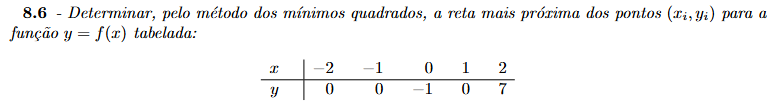

In [11]:
x86 = np.array([-2, -1, 0, 1, 2])
y86 = np.array([0, 0, -1, 0, 7])
e0_86 = np.power(x86, 0)
e1_86 = np.power(x86, 1)
e_86 = [e0_86, e1_86]
# Matriz de produtos internos
C_86 = np.zeros((2, 2), dtype=np.float64)
for i in range(2):
    for j in range(1, i - 1, -1):
        val = np.dot(e_86[i], e_86[j])
        C_86[i, j] = val
        if i != j:
            C_86[j, i] = val

# Vetor de produtos internos
b_86 = np.zeros((2,), dtype=np.float64)
for i in range(2):
    b_86[i] = np.dot(y86, e_86[i])

a_86 = np.linalg.solve(C_86, b_86)

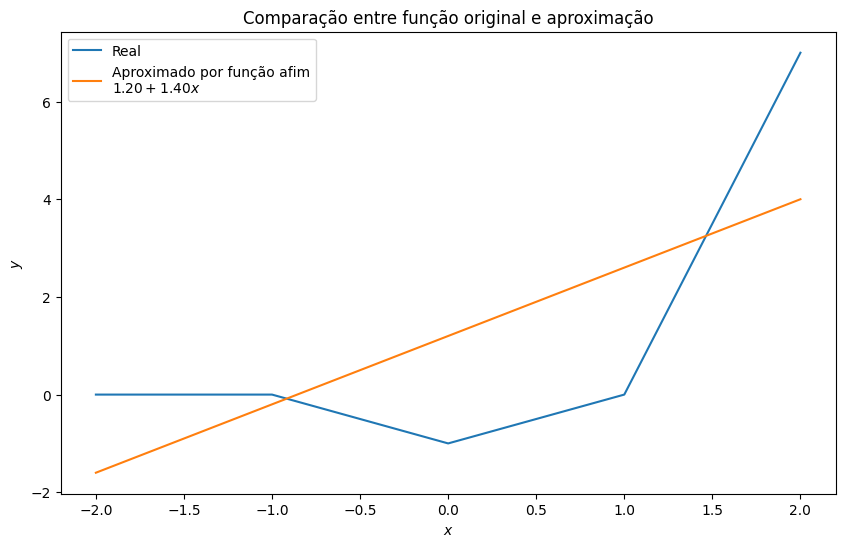

In [12]:
poly86 = lambda x: a_86[0] + a_86[1] * x
poly86_vals = poly86(x86)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x86, y86, label="Real")
ax.plot(x86, poly86_vals, label=f"Aproximado por função afim\n${a_86[0]:.2f} + {a_86[1]:.2f} x$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
ax.set_title("Comparação entre função original e aproximação")
plt.show()

# Exercício 8.7

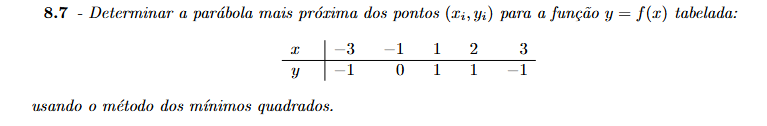

In [13]:
x87 = np.array([-3, -1, 1, 2, 3])
y87 = np.array([-1, 0, 1, 1, -1])
e0_87 = np.power(x87, 0)
e1_87 = np.power(x87, 1)
e2_87 = np.power(x87, 2)
e_87 = [e0_87, e1_87, e2_87]
n = len(e_87)
# Matriz de produtos internos
C_87 = np.zeros((n, n), dtype=np.float64)
for i in range(n):
    for j in range(n - 1, i - 1, -1):
        val = np.dot(e_87[i], e_87[j])
        C_87[i, j] = val
        if i != j:
            C_87[j, i] = val

# Vetor de produtos internos
b_87 = np.zeros((n,), dtype=np.float64)
for i in range(n):
    b_87[i] = np.dot(y87, e_87[i])

a_87 = np.linalg.solve(C_87, b_87)

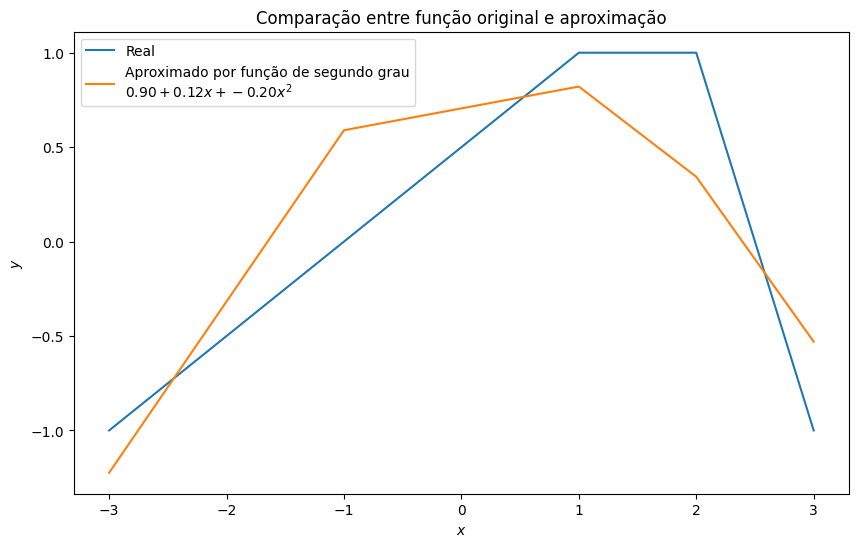

In [14]:
poly87 = lambda x: a_87[0] + a_87[1] * x + a_87[2] * x ** 2
poly87_vals = poly87(x87)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x87, y87, label="Real")
ax.plot(x87, poly87_vals, label=f"Aproximado por função de segundo grau\n${a_87[0]:.2f} + {a_87[1]:.2f} x + {a_87[2]:.2f} x^2$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
ax.set_title("Comparação entre função original e aproximação")
plt.show()

# Exercício 8.8

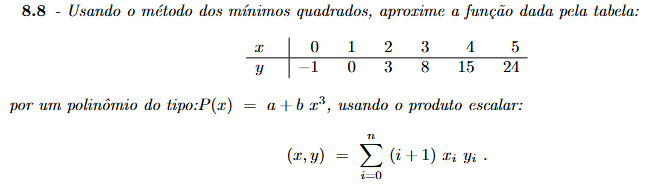

In [15]:
x88 = np.array([0, 1, 2, 3, 4, 5])
y88 = np.array([-1, 0, 3, 8, 15, 24])
e0_88 = np.power(x88, 0)
e2_88 = np.power(x88, 3)
e_88 = [e0_88, e2_88]
n = len(e_88)
# Definição do produto escalar apresentado
def new_dot(x: np.ndarray, y: np.ndarray):
    # Assume-se que x.ndim = y.ndim = 1 e que os tamanhos são iguais.
    sum_value = 0.0
    for i in range(len(x)):
        sum_value += (i + 1) * x[i] * y[i]
    return sum_value

# Matriz de produtos internos
C_88 = np.zeros((n, n), dtype=np.float64)
for i in range(n):
    for j in range(n - 1, i - 1, -1):
        val = new_dot(e_88[i], e_88[j])
        C_88[i, j] = val
        if i != j:
            C_88[j, i] = val

# Vetor de produtos internos
b_88 = np.zeros((n,), dtype=np.float64)
for i in range(n):
    b_88[i] = new_dot(y88, e_88[i])

a_88 = np.linalg.solve(C_88, b_88)

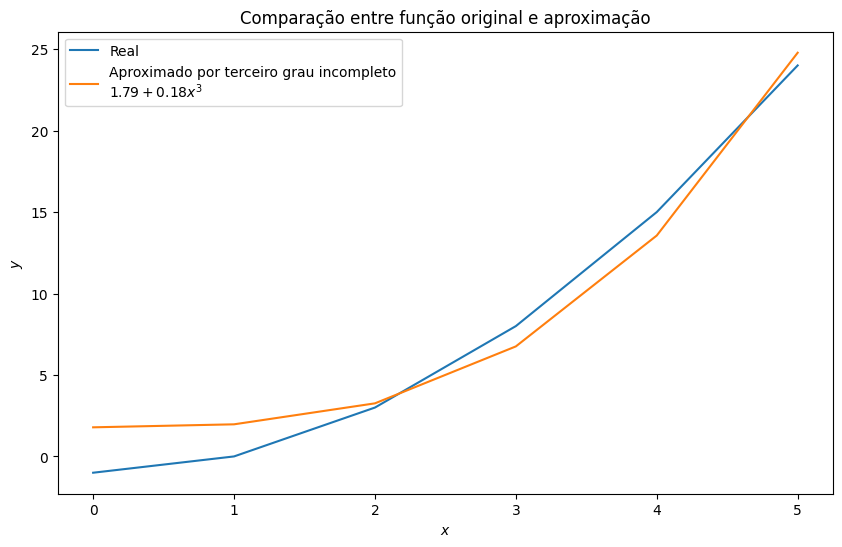

In [16]:
poly88 = lambda x: a_88[0] + a_88[1] * x ** 3
poly88_vals = poly88(x88)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x88, y88, label="Real")
ax.plot(x88, poly88_vals, label=f"Aproximado por terceiro grau incompleto\n${a_88[0]:.2f} + {a_88[1]:.2f} x^3$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
ax.set_title("Comparação entre função original e aproximação")
plt.show()

# Exercício 8.12

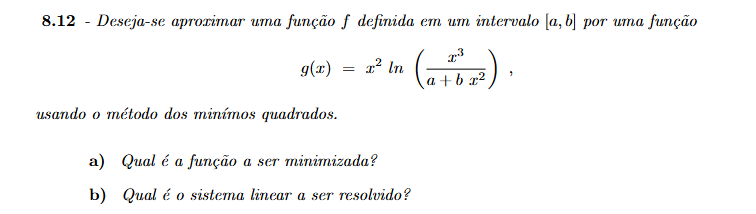

**a) Qual é a função a ser minimizada?**

No Método dos Mínimos Quadrados, a função a ser minimizada é a integral do quadrado da diferença entre a função original e a função aproximadora. Em casos discretos, isso pode ser computado pela soma da diferença ao quadrado nos pontos de dados fornecidos. No caso analítico, a função a ser minimizada é:

$$ E(c_1, c_2) = \int_a^b [f(x) - g(x)]^2\ dx = \int_a^b \left[f(x) - x^2 \ln \left( \frac{x^3}{c_1 + c_2 x^2} \right) \right]^2\ dx $$

O processo de mínimos quadrados visa encontrar os valores de $c_1$ e $c_2$ que minimizam essa função.

**b) Qual é o sistema linear a ser resolvido?**

O sistema linear a ser resolvido é obtido ao calcular as derivadas parciais da função de erro $E(c_1, c_2)$ em relação a $c_1$ e $c_2$ e igualá-las a zero. Isso resulta em um sistema de equações lineares que pode ser representado na forma matricial:

$$ \begin{bmatrix} \langle \frac{\partial g}{\partial c_1}, \frac{\partial g}{\partial c_1} \rangle & \langle \frac{\partial g}{\partial c_1}, \frac{\partial g}{\partial c_2} \rangle \\ \langle \frac{\partial g}{\partial c_2}, \frac{\partial g}{\partial c_1} \rangle & \langle \frac{\partial g}{\partial c_2}, \frac{\partial g}{\partial c_2} \rangle \end{bmatrix} \begin{bmatrix} c_1 \\ c_2 \end{bmatrix} = \begin{bmatrix} \langle f, \frac{\partial g}{\partial c_1} \rangle \\ \langle f, \frac{\partial g}{\partial c_2} \rangle \end{bmatrix} $$

# Exercício 8.13

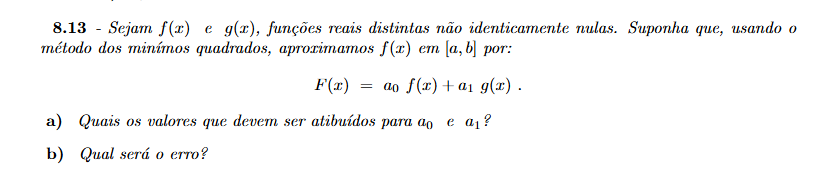

**a) Quais os valores devem ser atribuídos para $a_0$ e $a_1$?**

Dado que a função $F(x)$ busca representar a função $f(x)$ de forma a minimizar o quadrado da diferença entre essas duas funções integrada nesse intervalo, os valores de $a_0$ e $a_1$ que minimizam essa diferença é:

$$ \begin{cases} a_0 = 1 \\ a_1 = 0 \end{cases} $$

Pois dessa maneira, $F(x) = f(x)$, e a diferença entre as duas funções é zero em todo o intervalo, resultando no valor mínimo possível para a integral do quadrado da diferença.

**b) Qual será o erro?**

Como comentado na resolução do item anterior, como as duas funções serão coincidentes, o erro é dado por:

$$ \int_a^b [f(x) - 1 \cdot f(x)]^2\ dx = \int_a^b 0\ dx = 0 $$

Logo, isso confirma: o erro é zero, que minimiza o quadrado da diferença no intervalo $[a,b]$.

# Exercício 8.14

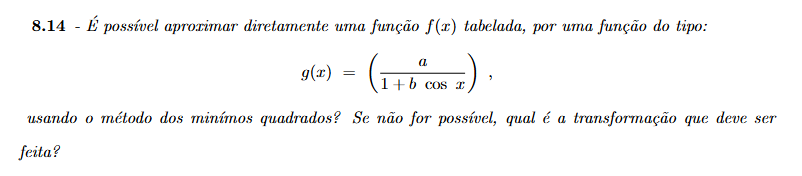

Como uma das incógnitas do processo de minimização por mínimos quadrados está presente no denominador, essa função $g(x)$ precisa ser alterada.

1. Primeiramente, podemos inverter a equação:

$$ (g(x))^{-1} = \frac{1 + b \cos x}{a} $$

2. Separando os termos no numerador:

$$ (g(x))^{-1} = \frac{1}{a} + \frac{b}{a}\cos x $$

3. Realizando as substituições:

$$ G(x) = (g(x))^{-1};\quad A = \frac{1}{a};\quad B = \frac{b}{a};\quad C(x) = \cos x $$

4. Por fim, temos:

$$ G(x) = A + BC(x) $$

Onde $A, B$ são incógnitas a serem determinadas, $C(x)$ pode ser determinada diretamente a partir das variáveis independentes dos dados de entrada, e $G(x)$ pode ser calculada a partir dos dados de $f(x)$ fornecidos. Nesse caso, a base do sub-espaço utilizado seria a base canônica, e o resultado do sistema linear seria dado por:

$$ b = \begin{bmatrix} \left\langle \displaystyle\frac{1}{f(x)}, 1 \right\rangle \\[5mm] \left\langle \displaystyle\frac{1}{f(x)}, \cos (x) \right\rangle \end{bmatrix} $$

As substituições realizadas podem ser revertidas para encontrar os valores de $a$ e $b$ a partir dos valores encontrados para $A$ e $B$:

$$ a = \frac{1}{A};\quad b = \frac{B}{A} $$

# Exercício 8.15

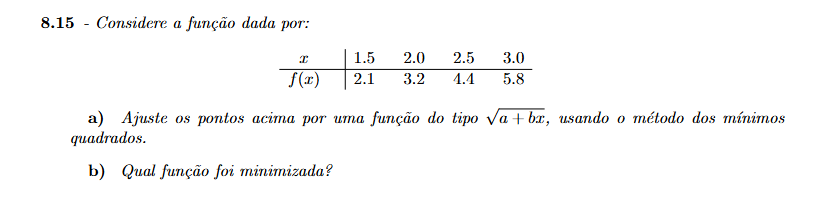

**a) Ajuste os pontos acima por uma função do tipo $\sqrt{a + bx}$, usando o método dos mínimos quadrados**

Dada uma função $g(x) = \sqrt{a + bx}$, precisamos elevar ambos os lados ao quadrado para aplicar o método dos mínimos quadrados:

$$ g(x)^2 = a + bx $$

Dessa forma, utilizamos a base canônica como base do sub-espaço, e o vetor resultante do sistema linear é dado por:

$$ b = \begin{bmatrix} \left\langle f(x)^2, 1 \right\rangle \\[2mm] \left\langle f(x)^2, x \right\rangle \end{bmatrix} $$

In [17]:
x815 = np.array([1.5, 2.0, 2.5, 3.0])
y815 = np.array([2.1, 3.2, 4.4, 5.8])
e0_815 = np.power(x815, 0)
e1_815 = np.power(x815, 1)
e_815 = [e0_815, e1_815]
n_815 = len(e_815)

# Matriz de produtos internos
C_815 = np.zeros((n_815, n_815), dtype=np.float64)
for i in range(n_815):
    for j in range(n_815 - 1, i - 1, -1):
        val = np.dot(e_815[i], e_815[j])
        C_815[i, j] = val
        if i != j:
            C_815[j, i] = val

# Vetor de produtos internos
b_815 = np.zeros((n_815,), dtype=np.float64)
y815_squared = np.power(y815, 2)
for i in range(n_815):
    b_815[i] = np.dot(y815_squared, e_815[i])

# Resolução do sistema linear
a_815 = np.linalg.solve(C_815, b_815)

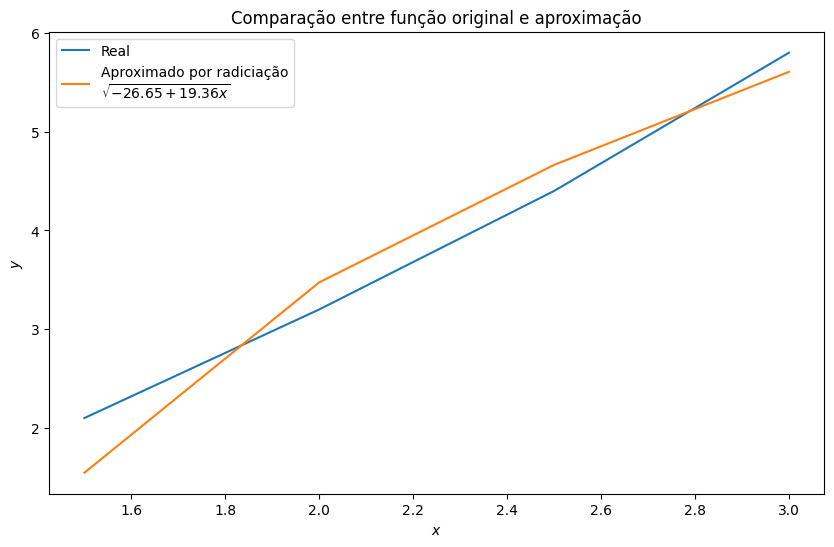

In [18]:
poly815 = lambda x: np.sqrt(a_815[0] + a_815[1] * x)
poly815_vals = poly815(x815)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x815, y815, label="Real")
ax.plot(x815, poly815_vals, label=f"Aproximado por radiciação\n$\\sqrt{{{a_815[0]:.2f} + {a_815[1]:.2f} x}}$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
ax.set_title("Comparação entre função original e aproximação")
plt.show()

**b) Qual função foi minimizada?**

Devido aos processos de transformação realizados para aplicar o método dos mínimos quadrados, a função que foi minimizada é:

$$ E(a, b) = \sum [f(x)^2 - (a + bx)]^2 $$

Aqui utiliza-se somatório pois os dados estão em forma discretizada.

# Exercício 8.16

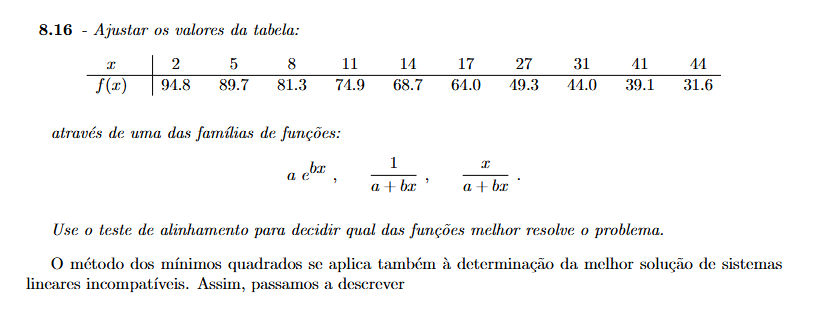

Vamos chamar as funções definidas de $g(x), $h(x)$, e $k(x)$, respectivamente.

No caso de $g(x) = a e^{bx}$, precisamos aplicar logaritmo natural em ambos os lados para linearizar a função:

$$ \ln(g(x)) = \ln(a) + bx $$

Substituindo $G = \ln(g(x))$ e $A = \ln(a)$, temos:

$$ G = A + bx $$

Que pode ser ajustada com base canônica e vetor resultante dado por:

$$ b = \begin{bmatrix} \left\langle \ln(f(x)), 1 \right\rangle \\[2mm] \left\langle \ln(f(x)), x \right\rangle \end{bmatrix} $$

---

No caso de $h(x) = \displaystyle\frac{1}{a+bx}$, invertemos a função:

$$ (h(x))^{-1} = a + bx $$

E novamente, precisamos apenas ajustar o vetor resultado de forma adequada.

---

Por fim, em $k(x) = \displaystyle\frac{x}{a + bx}$, invertemos a função e separamos os termos no numerador:

$$ (k(x))^{-1} = \frac{a + bx}{x} = b + \frac{a}{x} $$

Nesse caso, a base do sub-espaço é dada por $\left\{ 1, \displaystyle\frac{1}{x} \right\}$.

---

Para avaliar a melhor aproximação, vamos verificar qual minimiza da soma dos quadrados das diferenças entre a função original e a função aproximadora.

In [19]:
x816 = np.array([2, 5, 8, 11, 14, 17, 27, 31, 41, 44], dtype=np.float64)
y816 = np.array([94.8, 89.7, 81.3, 74.9, 68.7, 64.0, 49.3, 44.0, 39.1, 31.6])
e0_816 = np.power(x816, 0)
e1_816 = np.power(x816, 1)
efrac_816 = np.power(x816, -1)
e_816_canon = [e0_816, e1_816]
e_816_frac = [e0_816, efrac_816]
n_816 = n_816 = len(e_816_canon)

# Matrizes de produtos internos
C_816_canon = np.zeros((n_816, n_816), dtype=np.float64)
C_816_frac = np.zeros((n_816, n_816), dtype=np.float64)
for i in range(n_816):
    for j in range(n_816 - 1, i - 1, -1):
        val_canon = np.dot(e_816_canon[i], e_816_canon[j])
        val_frac = np.dot(e_816_frac[i], e_816_frac[j])
        C_816_canon[i, j] = val_canon
        C_816_frac[i, j] = val_frac
        if i != j:
            C_816_canon[j, i] = val_canon
            C_816_frac[j, i] = val_frac
        
# Vetores de produtos internos
b_816_g = np.zeros((n_816,), dtype=np.float64)
b_816_h = np.zeros((n_816,), dtype=np.float64)
b_816_k = np.zeros((n_816,), dtype=np.float64)
y816_ln = np.log(y816)
y816_frac = np.power(y816, -1)
for i in range(n_816):
    b_816_g[i] = np.dot(y816_ln, e_816_canon[i])
    b_816_h[i] = np.dot(y816_frac, e_816_canon[i])
    b_816_k[i] = np.dot(y816_frac, e_816_frac[i])

# Resolução dos sistemas lineares
a_816_g = np.linalg.solve(C_816_canon, b_816_g)
a_816_h = np.linalg.solve(C_816_canon, b_816_h)
a_816_k = np.linalg.solve(C_816_frac, b_816_k)

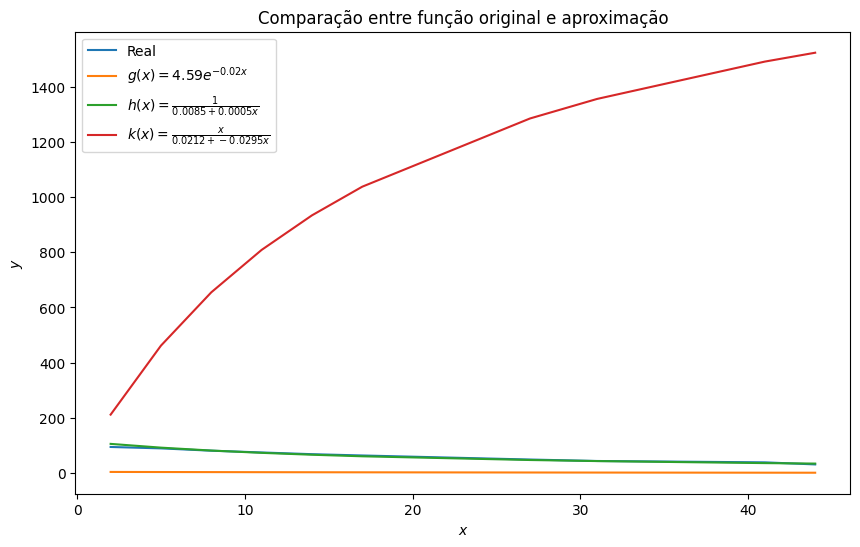

In [20]:
poly816_g = lambda x: a_816_g[0] * np.exp(a_816_g[1] * x)
poly816_g_vals = poly816_g(x816)
poly816_h = lambda x: 1 / (a_816_h[0] + a_816_h[1] * x)
poly816_h_vals = poly816_h(x816)
poly816_k = lambda x: x / (a_816_h[0] + a_816_h[1] * x)
poly816_k_vals = poly816_k(x816)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x816, y816, label="Real")
ax.plot(x816, poly816_g_vals, label=f"$g(x) = {a_816_g[0]:.2f} e^{{{a_816_g[1]:.2f}x}}$")
ax.plot(x816, poly816_h_vals, label=f"$h(x) = \\frac{{1}}{{{a_816_h[0]:.4f} + {a_816_h[1]:.4f}x}}$")
ax.plot(x816, poly816_k_vals, label=f"$k(x) = \\frac{{x}}{{{a_816_k[0]:.4f} + {a_816_k[1]:.4f}x}}$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
ax.set_title("Comparação entre função original e aproximação")
plt.show()

Claramente, a segunda função é a mais bem sucedida. Para confirmar, basta analisar a soma das diferenças ao quadrado de cada função:

In [21]:
err816_g = np.sum(np.power(poly816_g_vals - y816, 2))
err816_h = np.sum(np.power(poly816_h_vals - y816, 2))
err816_k = np.sum(np.power(poly816_k_vals - y816, 2))
display("Soma dos erros quadráticos de cada função:")
display(f"g: {str(err816_g)}")
display(f"h: {str(err816_h)}")
display(f"k: {str(err816_k)}")

'Soma dos erros quadráticos de cada função:'

'g: 40894.76877785847'

'h: 166.95181768025793'

'k: 10290270.303246208'

# Exercício 8.19

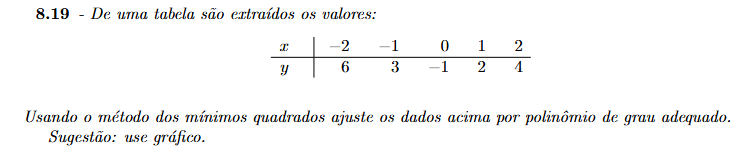

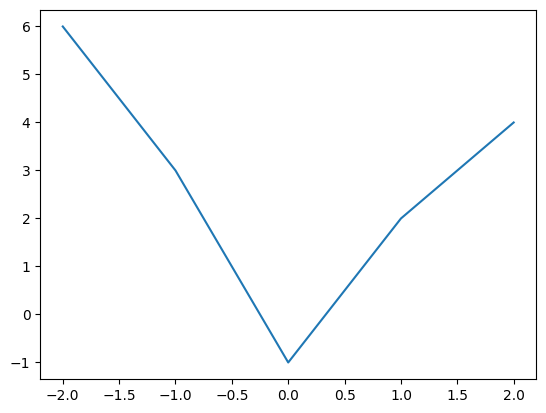

In [22]:
x819 = np.array([-2, -1, 0, 1,2])
y819 = np.array([6, 3, -1, 2, 4])

plt.plot(x819, y819)
plt.show()

A função se assemelha a uma parábola. Vamos aproximar a mesma com um polinômio de segundo grau.

In [23]:
e0_819 = np.power(x819, 0)
e1_819 = np.power(x819, 1)
e2_819 = np.power(x819, 2)
e_819 = [e0_819, e1_819, e2_819]
n = len(e_819)
# Matriz de produtos internos
C_819 = np.zeros((n, n), dtype=np.float64)
for i in range(n):
    for j in range(n - 1, i - 1, -1):
        val = np.dot(e_819[i], e_819[j])
        C_819[i, j] = val
        if i != j:
            C_819[j, i] = val

# Vetor de produtos internos
b_819 = np.zeros((n,), dtype=np.float64)
for i in range(n):
    b_819[i] = np.dot(y819, e_819[i])

a_819 = np.linalg.solve(C_819, b_819)

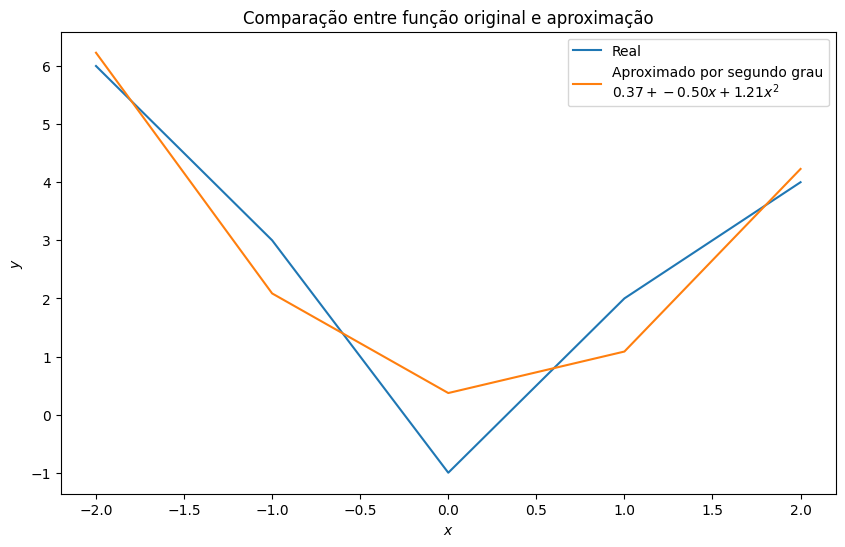

In [24]:
poly819 = lambda x: a_819[0] + a_819[1] * x + a_819[2] * x ** 2
poly819_vals = poly819(x819)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x819, y819, label="Real")
ax.plot(x819, poly819_vals, label=f"Aproximado por segundo grau\n${a_819[0]:.2f} + {a_819[1]:.2f} x + {a_819[2]:.2f} x^2 $")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
ax.set_title("Comparação entre função original e aproximação")
plt.show()

# Exercício 8.20

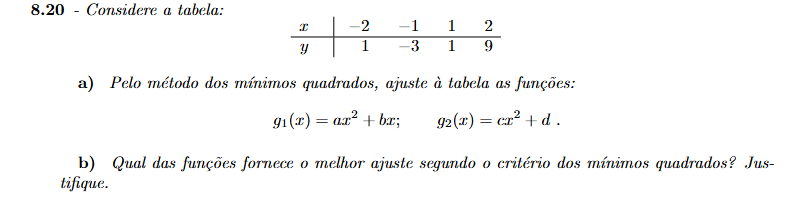

In [25]:
x820 = np.array([-2, -1, 1, 2])
y820 = np.array([1, -3, 1, 9])
e0_820 = np.power(x820, 0)
e1_820 = np.power(x820, 1)
e2_820 = np.power(x820, 2)

In [26]:
# Item g1

e_820_g1 = [e2_820, e1_820]
n_g1 = len(e_820_g1)

C_820_g1 = np.zeros((n_g1, n_g1), dtype=np.float64)
for i in range(n_g1):
    for j in range(n_g1 - 1, i - 1, -1):
        val = np.dot(e_820_g1[i], e_820_g1[j])
        C_820_g1[i, j] = val
        if i != j:
            C_820_g1[j, i] = val

b_820_g1 = np.zeros((n_g1,), dtype=np.float64)
for i in range(n_g1):
    b_820_g1[i] = np.dot(y820, e_820_g1[i])

a_820_g1 = np.linalg.solve(C_820_g1, b_820_g1)

In [27]:
# Item g2

e_820_g2 = [e2_820, e0_820]
n_g2 = len(e_820_g2)

C_820_g2 = np.zeros((n_g2, n_g2), dtype=np.float64)
for i in range(n_g2):
    for j in range(n_g2 - 1, i - 1, -1):
        val = np.dot(e_820_g2[i], e_820_g2[j])
        C_820_g2[i, j] = val
        if i != j:
            C_820_g2[j, i] = val

b_820_g2 = np.zeros((n_g2,), dtype=np.float64)
for i in range(n_g2):
    b_820_g2[i] = np.dot(y820, e_820_g2[i])

a_820_g2 = np.linalg.solve(C_820_g2, b_820_g2)

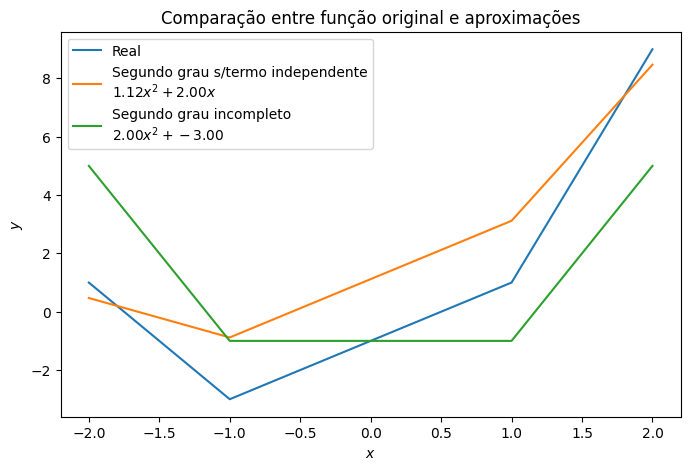

In [28]:
poly820_g1 = lambda x: a_820_g1[0] * x ** 2 + a_820_g1[1] * x
poly820_g1_vals = poly820_g1(x820)

poly820_g2 = lambda x: a_820_g2[0] * x ** 2 + a_820_g2[1]
poly820_g2_vals = poly820_g2(x820)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x820, y820, label="Real")
ax.plot(x820, poly820_g1_vals, label=f"Segundo grau s/termo independente\n${a_820_g1[0]:.2f} x^2 + {a_820_g1[1]:.2f} x$")
ax.plot(x820, poly820_g2_vals, label=f"Segundo grau incompleto\n${a_820_g2[0]:.2f} x^2 + {a_820_g2[1]:.2f}$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
ax.set_title("Comparação entre função original e aproximações")
plt.show()

O critério dos quadrados mínimos é a diferença entre cada ponto real e o ponto aproximado, elevada ao quadrado, somada para todos os pontos. Para comparar as soluções, basta ver qual retorna menor valor.

In [29]:
erro_820_g1 = np.sum(np.power(y820 - poly820_g1_vals, 2.0))
erro_820_g2 = np.sum(np.power(y820 - poly820_g2_vals, 2.0))
print(f"Erro item g1: {erro_820_g1}")
print(f"Erro item g2: {erro_820_g2}")

Erro item g1: 9.529411764705882
Erro item g2: 40.0


Logo, a função dada por $g_1(x) = 1.11764706 x^2 + 2x$ é que melhor ajusta a função tabelada.

# Exercício 8.21

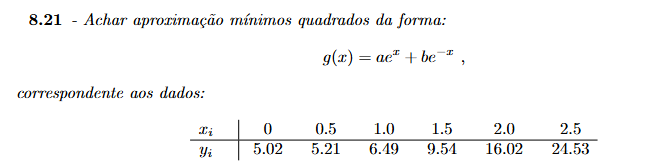

In [30]:
x821 = np.array([0, 0.5, 1.0, 1.5, 2.0, 2.5])
y821 = np.array([5.02, 5.21, 6.49, 9.54, 16.02, 24.53])
e0_821 = np.exp(x821)
e1_821 = np.exp(-x821)
e_821 = [e0_821, e1_821]
n = len(e_821)

# Matriz de produtos internos
C_821 = np.zeros((n, n), dtype=np.float64)
for i in range(n):
    for j in range(n - 1, i - 1, -1):
        val = new_dot(e_821[i], e_821[j])
        C_821[i, j] = val
        if i != j:
            C_821[j, i] = val

# Vetor de produtos internos
b_821 = np.zeros((n,), dtype=np.float64)
for i in range(n):
    b_821[i] = new_dot(y821, e_821[i])

a_821 = np.linalg.solve(C_821, b_821)

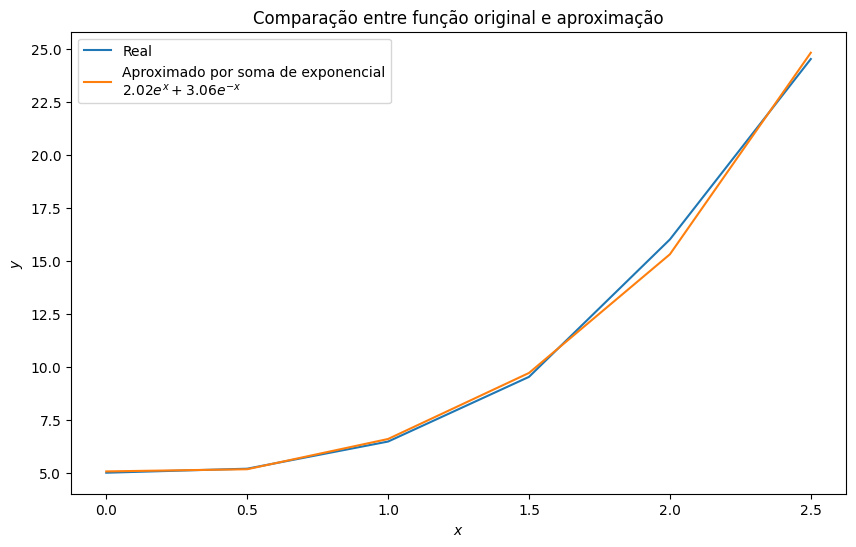

In [31]:
poly821 = lambda x: a_821[0] * np.exp(x) + a_821[1] * np.exp(-x)
poly821_vals = poly821(x821)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x821, y821, label="Real")
ax.plot(x821, poly821_vals, label=f"Aproximado por soma de exponencial\n${a_821[0]:.2f} e^x + {a_821[1]:.2f} e^{{-x}}$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
ax.set_title("Comparação entre função original e aproximação")
plt.show()

# Exercício 8.22

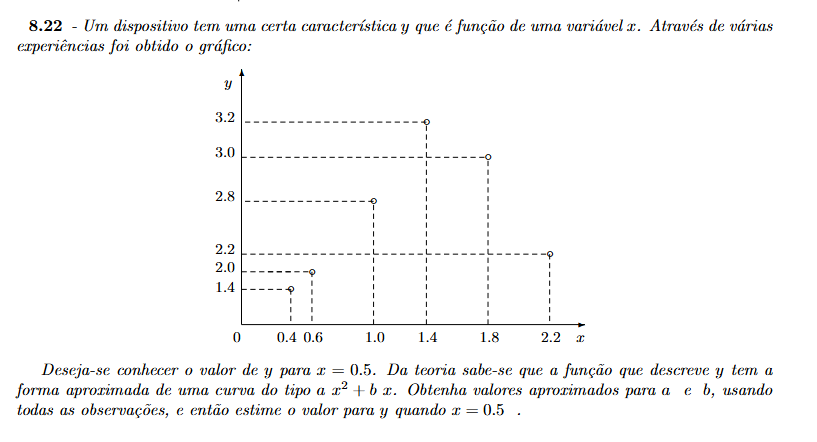

In [32]:
x822 = np.array([0.4, 0.6, 1.0, 1.4, 1.8, 2.2])
y822 = np.array([1.4, 2.0, 2.8, 3.2, 3.0, 2.2])

e_822_2 = np.power(x822, 2)
e_822_1 = np.power(x822, 1)
e_822 = [e_822_2, e_822_1]
n_822 = len(e_822)

C_822 = np.zeros((n_822, n_822), dtype=np.float64)
for i in range(n_822):
    for j in range(n_822 - 1, i - 1, -1):
        val = np.dot(e_822[i], e_822[j])
        C_822[i, j] = val
        if i != j:
            C_822[j, i] = val

# Vetor de produtos internos
b_822 = np.zeros((n_822,), dtype=np.float64)
for i in range(n_822):
    b_822[i] = np.dot(y822, e_822[i])

a_822 = np.linalg.solve(C_822, b_822)

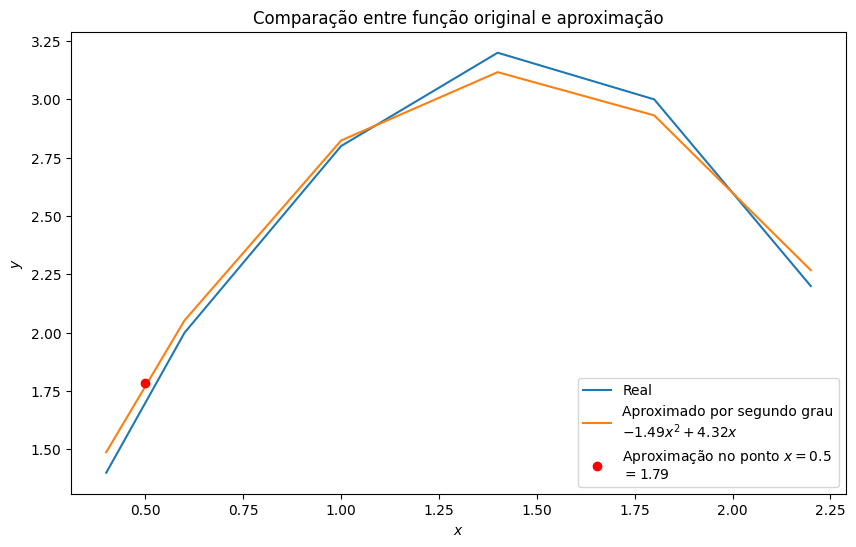

In [33]:
poly822 = lambda x: a_822[0] * (x ** 2) + a_822[1] * x
poly822_vals = poly822(x822)
y_at05 = poly822(0.5)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x822, y822, label="Real")
ax.plot(x822, poly822_vals, label=f"Aproximado por segundo grau\n${a_822[0]:.2f} x^2 + {a_822[1]:.2f} x$")
ax.scatter([0.5], y_at05, label=f"Aproximação no ponto $x=0.5$\n$ = {y_at05:.2f}$", color="red", zorder=2)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
ax.set_title("Comparação entre função original e aproximação")
plt.show()